<a href="https://colab.research.google.com/github/CataQM/CataQM/blob/main/Comparaci%C3%B3n_m%C3%A9todos_op_multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparación de Alguno Métodos de Optimización Multivariable
## Autora : Catalina Quincosis Martínez
### Segunda entrega del curso de optimización (2021-1) de la universidad del valle a cargo del profesor Migue Ángel Vargas Valencia.

A continuación se usarán cuatro métodos de optimización multivariable sobre la función de Beale, estos métodos son : Método de Nelder-Mead, Método del descenso del gradiente, Método CG y Newton CG.



In [363]:
#@title Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


In [364]:
#@title Definimos el dominio y la malla para la función de Rosenbrock
x_min, x_max = -2.5, 2
y_min, y_max = -2, 6 

xx = np.linspace(x_min,x_max,100) # Patición x
yy = np.linspace(y_min,y_max,100) # Patición y
X, Y = np.meshgrid(xx, yy)        # Malla

Función de Rosenbrock:

$$R(x,y)= (a-x)^2 + b(y-x^2)^2$$

para ciertos valores de a y b.

**Nota**: Usualmente $a=1$ y $b=100$.

En este caso usaremos lo siguientes valores:


$$a=0.55$$
$$b=5$$

In [365]:
#Definimos la función de Rosenbrock
def rosenbrock(x):
    return (0.55-x[0])**2 + 5*(x[1]-x[0]**2)**2   ## donde x es una lista de 2 elementos.

Z2 = rosenbrock([X,Y])

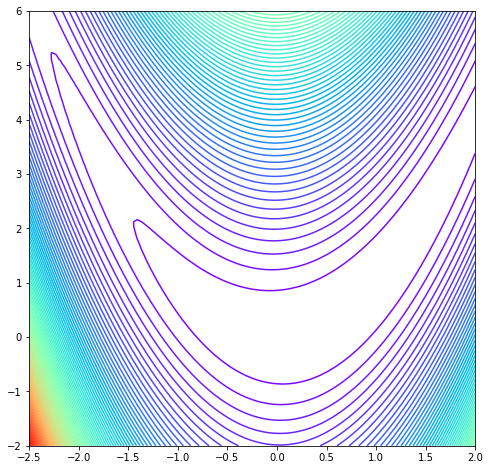

In [366]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z2, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.show()

## Representación 3D de la función de Rosenbrock

In [367]:

R = lambda x,y: (0.55-x)**2 + 5*(y-x**2)**2;

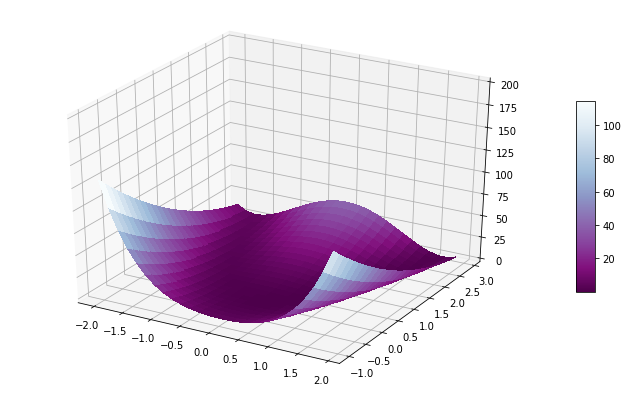

In [368]:
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Zr = R(X,Y)

# Plot the surface
surR = axRos.plot_surface(X, Y, Zr, cmap=cm.BuPu_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surR, shrink=0.5, aspect=10)
plt.show()

In [369]:
#@title Malla y dominio de la función de Rosenbrock
x_minr, x_maxr = -6, 6 
y_minr, y_maxr = -6, 6 

xx = np.linspace(x_minr,x_maxr,100) # Patición x
yy = np.linspace(y_minr,y_maxr,100) # Patición y
X, Y = np.meshgrid(xx, yy)        # Malla

In [370]:
#@title Definimos el punto de partida para el proceso de optimización de Rosenbrock
x0r = [-2,-1]

liXr = [x0r[0]]
liYr = [x0r[1]]
liFr = [rosenbrock(x0r)]

def store(X):
    global liXr
    global liYr
    global liFr
    x, y = X
    liXr.append(x)
    liYr.append(y)
    liFr.append(rosenbrock(X))

In [371]:
#@title Definimos el dominio y la malla para la función de Beale
x_min, x_max = -4.5, 4.5
y_min, y_max = -4.5, 4.5 

xx = np.linspace(x_min,x_max,100) # Patición x
yy = np.linspace(y_min,y_max,100) # Patición y
X, Y = np.meshgrid(xx, yy)        # Malla

# La función de Beale
$$F(x,y)=(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2$$





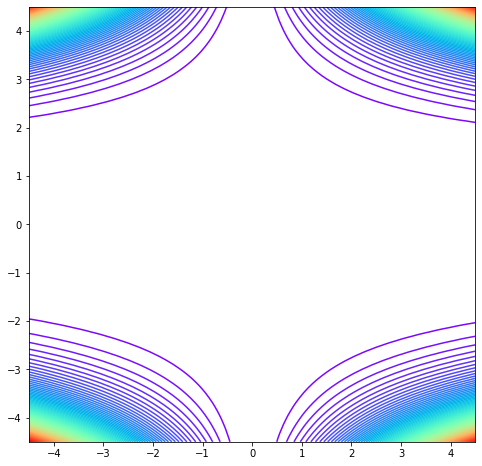

In [372]:
#@title Curvas de nivel de la función de Beale
def beale(x):
  return (1.5-x[0]+x[0]*x[1])**2+(2.25-x[0]+x[0]*x[1]**2)**2+(2.625-x[0]+x[0]*x[1]**3)**2

Z = beale([X,Y])
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.show()

# Representación 3D de la función de Beale


In [373]:
#Definimos la función de Beale para la representación 3D
B = lambda x,y: (1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2;

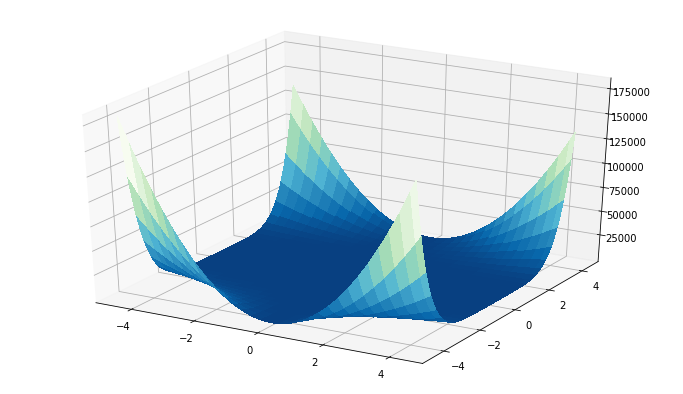

In [374]:
# Initializamos la figura
figB = plt.figure(figsize=(12, 7))
axB = figB.gca(projection='3d')

# Evaluamos la función
X2 = np.arange(-4.5, 4.5, 0.15)
Y2 = np.arange(-4.5, 4.5, 0.15)
X2, Y2 = np.meshgrid(X2, Y2)
Zb = B(X2,Y2)

# Graficamos la superficie
surB = axB.plot_surface(X2, Y2, Zb, cmap=cm.GnBu_r, linewidth=0, antialiased=False)
axRos.set_zlim(0, 100)
figRos.colorbar(surB, shrink=0.5, aspect=10)
plt.show()

In [375]:
#@title Definimos el punto de partida de la función de Beale para el proceso de optimización 

x0 = [4,0]

liX = [x0[0]]
liY = [x0[1]]
liF = [beale(x0)]

def store(X):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(beale(X))

In [376]:
#@title Definimos el punto de partida de la función de Rosenbrock para el proceso de optimización 

x0r = [-2.5, 5]

liXr = [x0r[0]]
liYr = [x0r[1]]
liFr = [rosenbrock(x0r)]

def store(X):
    global liXr
    global liYr
    global liFr
    x, y = X
    liXr.append(x)
    liYr.append(y)
    liFr.append(rosenbrock(X))

# Análisis del método de Nelder-Mead

Este método es muy útil para encontara el mínimo de una función definida en un espacio n-dimensional, sin necesidad de las derivadas parciales puesto que éste proceso puede ser muy costoso de calcular computacionalmente hablando.

La idea principal del método de Nelder-Mead es localizar el mínimo de una función usando el concepto geométrico del simplex, donde cada iteración comienza con un simplex de $R^n$ dado por los $n+1$ vértices más los valores funcionales. Posteriormente, se realizan evaluaciones sobre algunos parámetros que determinan los nuevos vértices que cumplen con alguna condición de descenso, en comparación con el simplex inicial de la iteración.

## Nelder-Mead sobre Rosenbrock

In [377]:
optimize.minimize(rosenbrock, x0r, method="Nelder-Mead", callback=store, options={"xtol": 1e-10})

 final_simplex: (array([[0.55  , 0.3025],
       [0.55  , 0.3025],
       [0.55  , 0.3025]]), array([1.75426575e-21, 4.61148426e-21, 5.41119482e-21]))
           fun: 1.7542657463684196e-21
       message: 'Optimization terminated successfully.'
          nfev: 207
           nit: 110
        status: 0
       success: True
             x: array([0.55  , 0.3025])

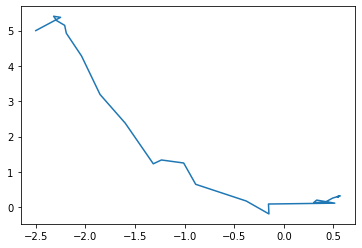

In [378]:
plt.plot(liXr, liYr)

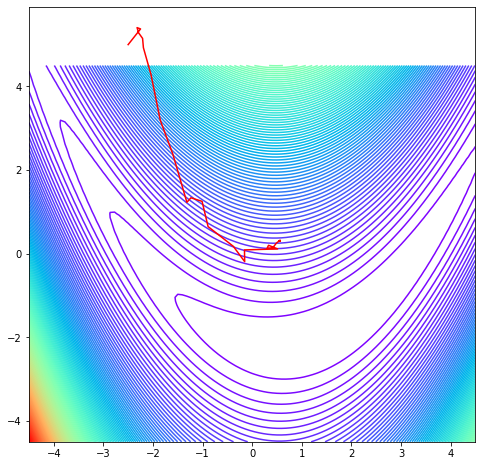

In [379]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z2, 150, cmap="rainbow") #nada, coolwarm
plt.plot(liXr,liYr, color='red')

plt.show()

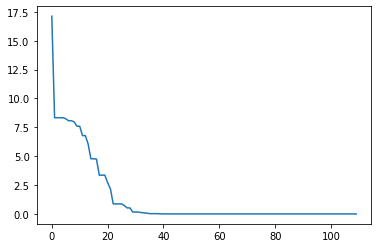

In [380]:
## ERROR ABSOLUTO
plt.plot(np.abs(liFr))




## Nelder-Mead sobre Beale

In [381]:
optimize.minimize(beale, x0, method="Nelder-Mead", callback=store, options={"xtol": 1e-10})
#optimize.minimize( beale, x0, method="Nelder-Mead", jac= hess= ,callback=store, options={"xtol": 1e-10})

 final_simplex: (array([[3. , 0.5],
       [3. , 0.5],
       [3. , 0.5]]), array([2.95891606e-22, 6.85957766e-22, 2.93154407e-21]))
           fun: 2.958916060530353e-22
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 112
        status: 0
       success: True
             x: array([3. , 0.5])

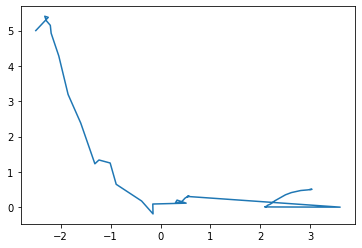

In [382]:
plt.plot(liXr, liYr)

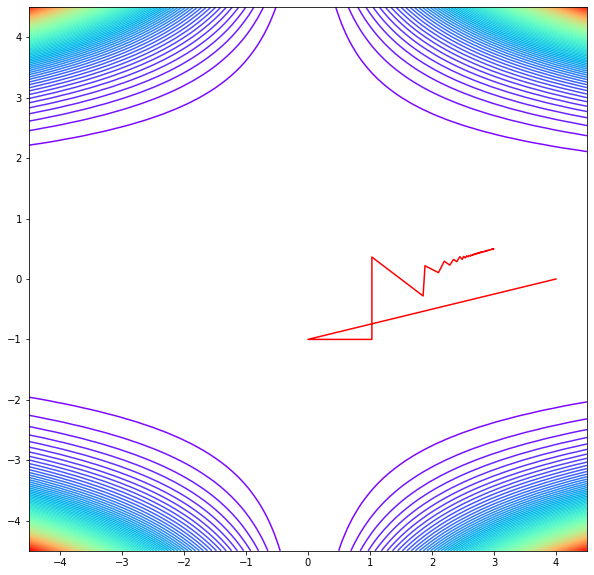

In [408]:
plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z, 100, cmap="rainbow") #nada, coolwarm
plt.plot(liX,liY, color='red')

plt.show()

La función de Beale es una función utilizada en la evaluación de este tipo de métodos. Presenta una especie de asíntotas que dificultan la búsqueda con los simplex, es por esto que se observa un camino errático.

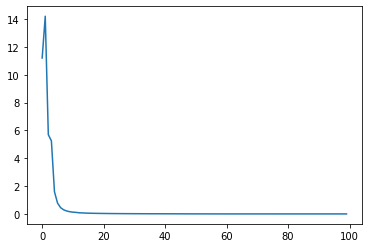

In [409]:
## ERROR ABSOLUTO
plt.plot(np.abs(liF))

El error se empieza a estabilizar en la iteración 20, lo que indica el costo del método en la función de Beale. También se hicieron pruebas en otros puntos pero hay mucha dificuldad cuando el punto inicial no se encuentra en el "cuadrante" del mínimo.

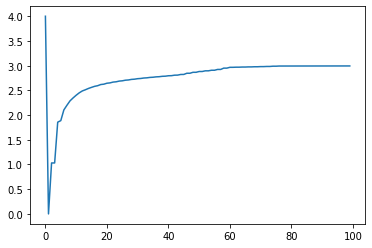

In [410]:
plt.plot(liX)

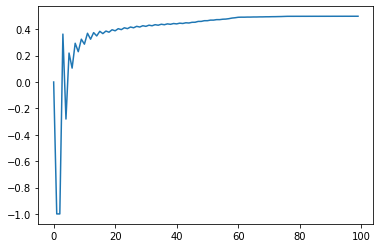

In [411]:
plt.plot(liY)

# Análisis de método descenso del gradiente

Este método iterativo busca avanzar en dirección opuesta al gradiente. El tamaño de los pasos que se deben dar es establecido por $ k $ el parámetro de tunning.

Dada una posición $x$ se puede avanzar a una nueva posición $\hat x$ que dependerá del paso que se de, tamaño y dirección $\hat x=x-k\nabla f(x) $.

Para cada posición se puede medir la diferencia entre $\hat x$ y $x$ si ésta es menor que cierto humbral o si llegamos a un máximo de iteraciones, se puede contenplar el hecho de que hemos alcanzado un mínimo.

In [387]:
#Defina el gradiente de la función de rosenbrock
def Drosenbrock(x):
  return np.array([-2*(0.55-x[0])-20*x[0]*(x[1]-x[0]**2), 10*(x[1]-x[0]**2) ])

In [388]:
#Primero hago el análisis para la funciónde Rosembrock. Indicativo 'ros' para nuevas listas de Rosenbrock

liXros = []
liYros = []
liFros = []
def gradient_descent(x0r, rosenbrock, Drosenbrock):
  x_i, y_i = x0
  for i in range(1,100):
    liXros.append(x_i)
    liYros.append(y_i)
    liFros.append(rosenbrock([x_i,y_i]))
    dx_i, dy_i= Drosenbrock([x_i,y_i])
    alpha = optimize.line_search(rosenbrock, Drosenbrock, np.array([x_i,y_i]), -np.array([dx_i, dy_i])) [0] ## [0] por que lo primero que regresa es el alpha, no necesitamos lo demas
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    x_i += - alpha*dx_i  # x_i = x_i - alpha * dx_i
    y_i += - alpha*dy_i
    if np.abs(liFros[-1]) < 1e-10:
      break

In [389]:
# ojo con el intervalo
gradient_descent([-2.5, 5], rosenbrock, Drosenbrock)

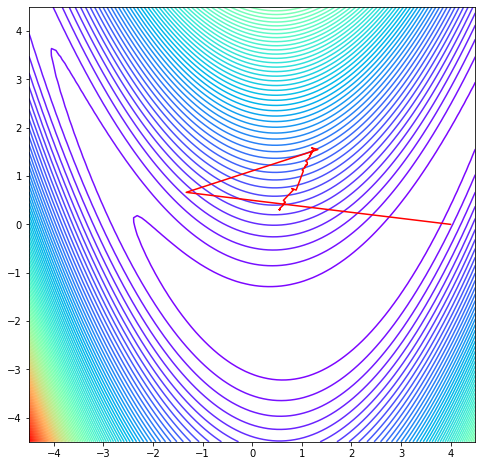

In [390]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z2, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liXros,liYros, color='red')  # Camino de las iteraciones de Método de máximo descenso  (Gradiente)
plt.show()

In [391]:
#Agregué un guión bajo a las listas para no confundirlas con las otras aunque creo que solo era necesario porque trabajaré con la misma función. anyway

def gradient_descent(x0, beale, Dbeale):
  x_i, y_i = x0
  for i in range(1,100):
    liX.append(x_i)
    liY.append(y_i)
    liF.append(beale([x_i,y_i]))
    dx_i, dy_i= Dbeale([x_i,y_i])
    alpha = optimize.line_search(beale, Dbeale, np.array([x_i,y_i]), -np.array([dx_i, dy_i])) [0] ## [0] por que lo primero que regresa es el alpha, no necesitamos lo demas
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    x_i += - alpha*dx_i  # x_i = x_i - alpha * dx_i
    y_i += - alpha*dy_i
    if np.abs(liF[-1]) < 1e-16:
      break

In [392]:
#Defino el gradiente de la función de Beale
def Dbeale(x):
  return np.array([2*x[0]*x[1]**6+2*x[0]*x[1]**4+5.25*x[1]**3-4*x[0]*x[1]**3+4.5*x[1]**2-2*x[0]*x[1]**2+3*x[1]-4*x[0]*x[1]+6*x[0]-12.75, 6*x[0]**2*x[1]**5+4*x[0]**2*x[1]**3-6*x[0]**2*x[1]**2-2*x[0]**2*x[1]-2*x[0]**2+15.75*x[0]*x[1]**2+9*x[0]*x[1]+3*x[0]])

In [393]:
#Hay valores donde no encuentra el óptimo alpha
gradient_descent([0,-1], beale, Dbeale)


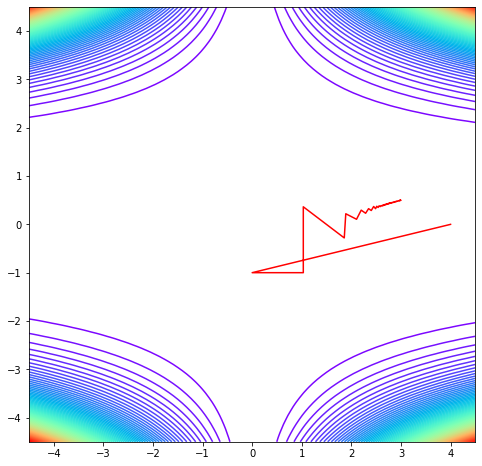

In [394]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow") #coolwarm linestyles="dotted"
plt.plot(liX,liY, color='red')  # Camino de las iteraciones de Método de máximo descenso  (Gradiente)
plt.show()

# Análisis del Métodod CG (gradiente conjugado)

Los métodos de descenso responden a la generalización del método del gradiente, el cual comienza a iterar en un punto arbitrario $x_0$ y se continúa siguiendo la línea de máximo descenso del paraboloide, obteniendo de ésta forma una sucesión de puntos hasta llegar ala solución.

Para definir el dominio: 

*   Definimos "brakets"
*   Definimos partición de los "brakets"
*   Definimos malla

## CG sobre Rosenbrock

Ya se tenía definida tanto la malla como el dominio, de manera que basta con aplicar el método sobre los datos obtenidos:

In [395]:
optimize.minimize(rosenbrock, x0r, method="CG", callback=store, options={"ftol": 1e-10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: ftol
  """Entry point for launching an IPython kernel.


     fun: 1.936566582608068e-12
     jac: array([1.21819760e-06, 1.52323613e-06])
 message: 'Optimization terminated successfully.'
    nfev: 124
     nit: 17
    njev: 31
  status: 0
 success: True
       x: array([0.55000135, 0.30250163])

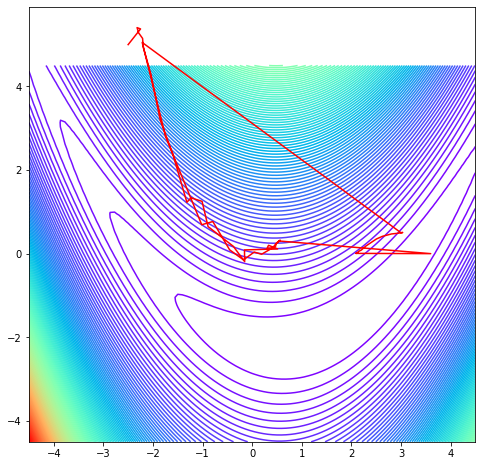

In [396]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z2, 150, cmap="rainbow") #nada, coolwarm
plt.plot(liXr,liYr, color='red')

plt.show()

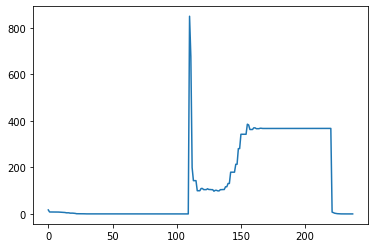

In [397]:
## ERROR ABSOLUTO
plt.plot(np.abs(liFr))

## CG sobre Beale

In [398]:
optimize.minimize(beale, x0, method="CG", callback=store, options={"ftol": 1e-10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: ftol
  """Entry point for launching an IPython kernel.


     fun: 8.333073017599077e-12
     jac: array([-4.15208183e-06,  8.25517019e-06])
 message: 'Optimization terminated successfully.'
    nfev: 108
     nit: 11
    njev: 27
  status: 0
 success: True
       x: array([2.99999308, 0.49999846])

# Análisis del Método Newton CG

Se probará nuevamente éste método con las funciones de Rosenbrock y Beale. Este método del gradiente conjugado necesita tando del jacobiano como de la Hessiana de la función

## Newton CG sobre Rosenbrock

$$R(x,y)= (a-x)^2 + b(y-x^2)^2$$\\


$$ J_{R} (x,y)= \begin{pmatrix} -2(a-x) - 4 x b(y-x^2 )  \\ 2b(y-x^2 )  \end{pmatrix}  $$ \\

$$ H_{R} (x,y)= \begin{pmatrix} 2 - 4b(y- x^2 ) + 8bx^2  & -4xb  \\ -4bx & 2b \end{pmatrix}  $$ 

In [399]:
#Definición del Jacobiono de la función de Rosenbrock
a=0.55
b=5
def JR(x):
  der = np.zeros_like(x)
  der[0]= -2*(a-x[0]) - 4*x[0]*b*(x[1] - x[0]**2)
  der[1]= 2*b*(x[1] - x[0]**2)
  return der

In [400]:
def HR(x):
  x = np.asarray(x)
  H = np.diag([2-4*b*(x[1]-x[0]**2) + 8*b*(x[0]**2) , 2*b ])
  H[1,0]= -4*b*x[0]
  H[0,1]= -4*b*x[0]
  return H

In [401]:
#El indicativo 'nr' se refiere al método Newton CG sobre la función de Rosenbrock
x0nr=[-2,5]

liXnr = [x0nr[0]]
liYnr = [x0nr[1]]
liFnr = [rosenbrock(x0nr)]

def store(X):
    global liXnr
    global liYnr
    global liFnr
    x, y = X
    liXnr.append(x)
    liYnr.append(y)
    liFnr.append(rosenbrock(X))

In [402]:
liXnr = []
liYnr = []
liFnr = []
optimize.minimize(rosenbrock, x0nr, jac=JR, hess=HR, method="Newton-CG", callback=store, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 30
         Gradient evaluations: 52
         Hessian evaluations: 23


     fun: 3.1262993322343606e-23
     jac: array([ 7.61213315e-12, -1.50413015e-11])
 message: 'Optimization terminated successfully.'
    nfev: 30
    nhev: 23
     nit: 23
    njev: 52
  status: 0
 success: True
       x: array([0.55  , 0.3025])

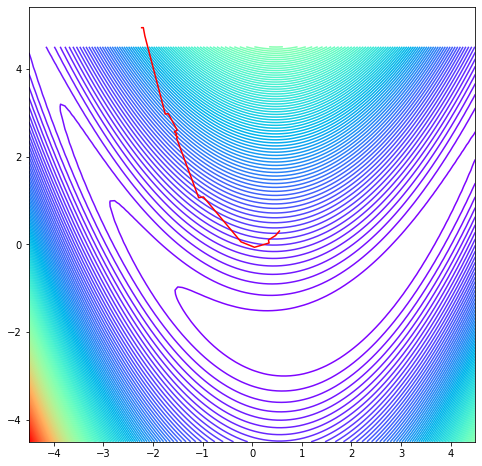

In [403]:
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z2, 150, cmap="rainbow") #nada, coolwarm
plt.plot(liXnr,liYnr, color='red')

plt.show()

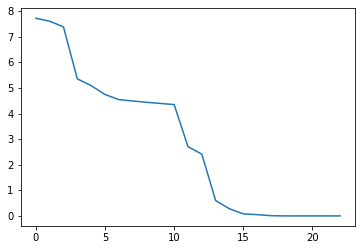

In [404]:
## ERROR ABSOLUTO NEWTON CG
plt.plot(np.abs(liFnr))

## Newton CG sobre Beale

$$F(x,y)=(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2$$

$$ J_F(x,y)= \begin{pmatrix} 2xy^6+2xy^4+5.25y^3-4xy^3+4.5y^2-2xy^2+3y-4xy+6x-12.75\\  6x^2y^5+4x^2y^3-6x^2y^2-2x^2y-2x^2+15.75xy^2+9xy+3x  \end{pmatrix}  $$ \\



In [405]:
#Definición del Jacobiono de la función de Beale

def JB(x):
  derb = np.zeros_like(x)
  derb[0] = 2*x[0]*x[1]**6+2*x[0]*x[1]**4+5.25*x[1]**3-4*x[0]*x[1]**3+4.5*x[1]**2-2*x[0]*x[1]**2+3*x[1]-4*x[0]*x[1]+6*x[0]-12.75
  derb[1] = 6*x[0]**2*x[1]**5+4*x[0]**2*x[1]**3-6*x[0]**2*x[1]**2-2*x[0]**2*x[1]-2*x[0]**2+15.75*x[0]*x[1]**2+9*x[0]*x[1]+3*x[0]
  return derb

In [406]:
#Definición de la Hessiana de la función de Beale
def HB(x):
  x = np.asarray(x)
  Hb = np.diag([2*x[1]**6+2*x[1]**4-4*x[1]**3-2*x[1]**2-4*x[1]+6 , 30*x[0]**2*x[1]**4+12*x[0]**2*x[1]**2-12*x[0]**2*x[1]-2*x[0]**2+31.5*x[0]*x[1]+9*x[0]  ])
  Hb[1,0] = 12*x[0]*x[1]**5+8*x[0]*x[1]**3+15.75*x[2]**2-12*x[0]*x[1]**2+9*x[1]-4*x[0]*x[1]+3-4*x[0] 
  Hb[0,1]= 12*x[1]**5*x[0]+8*x[1]**3*x[0]-12*x[1]**2*x[0]-4*x[1]*x[0]-4*x[0]+15-75*x[1]**2+9*x[1]+3
  return Hb

In [407]:
#liX = []
#liY = []
#liF = []
#optimize.minimize(beale, x0, jac=JB, hess=HB, method="Newton-CG", callback=store, options={'xtol': 1e-8, 'disp': True})
# index 2 is out of bounds for axis 0 with size 2, es el error que me arroja

# Conclusiones

*   El método de Nelder-Mead hace una buena aproximación de los mínimos de las funciones de Beale y Rosenbrock.
*  Los métodos que requieren el cálculo de las derivadas parciales de las superficies, son métodos costosos de calcular dependiendo de la función.
*   La función de Beale presenta una especia de asíntotas que entorpecen la convergancia del  método de descendo del gradiente.
*   El método del gradiente conjugado fue el que menor número de iteraciones ocupó para llegar al mínimo.





# Referencias

Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.

Elvio A. Pilotta. El método de Nelder-Mead para minimozación irrestricta sin derivadas.

Ultano Kindelán. Método del gradiente conjugado.


